In [1]:
import n2df
import numpy
import matplotlib.pyplot as plt

/home/amigos/ros/src/necst/lib/n2df.py:63: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('c', '<i')])


In [2]:
!ls /home/amigos/data/skydip_xffts/20190907193057/

skydip.ndf


In [5]:
analy_dir = "/home/amigos/data/skydip_xffts/20190907193057/skydip.ndf"

In [6]:
n = n2df.Read(analy_dir)

In [26]:
obs_mode = n.read_obs_mode()
array = n.read_onearray(0)
El = n.read_scan_num()

100%|██████████| 112/112 [00:00<00:00, 56906.37it/s]


In [27]:
obs_mode = numpy.array(obs_mode)
scan_num = numpy.array(scan_num)
array = numpy.array(array)

In [37]:
hotmask = obs_mode == "HOT"
skymask = obs_mode == "SKY"
El_index = numpy.unique(scan_num[skymask])

In [40]:
hot = sum(array[hotmask])

In [42]:
d = []
for i in El_index:
    Elmask = scan_num == i
    d.append(sum(array[Elmask]))

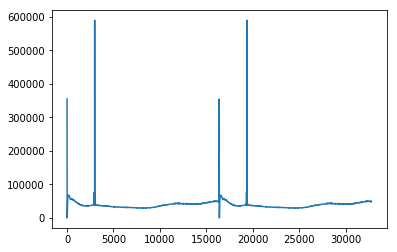